In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('electric_vehicle_charging_station_list.csv')
df.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [41]:
df.describe()

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


In [42]:
df.shape

(202, 9)

In [43]:
df.isna().sum()

no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64

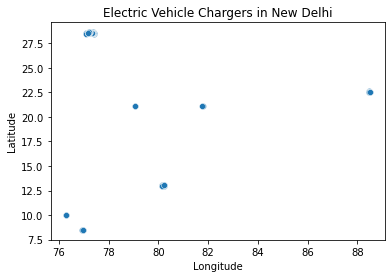

In [44]:
sns.scatterplot(x='longitude', y='latitude', data=df)

# Set the title and axis labels
plt.title('Electric Vehicle Chargers in New Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

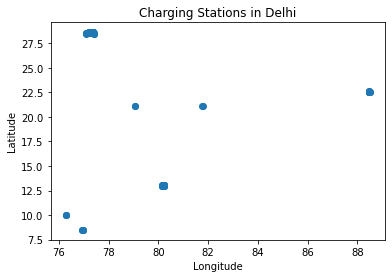

In [45]:
plt.scatter(df['longitude'], df['latitude'])

# add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Charging Stations in Delhi')

# display the plot
plt.show()

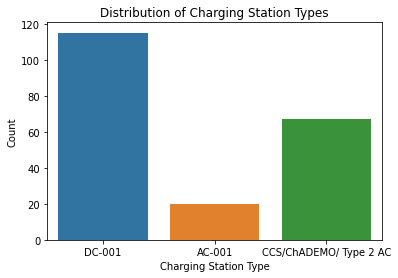

In [46]:
sns.countplot(x='type', data=df)

# add labels and title
plt.xlabel('Charging Station Type')
plt.ylabel('Count')
plt.title('Distribution of Charging Station Types')

# display the plot
plt.show()

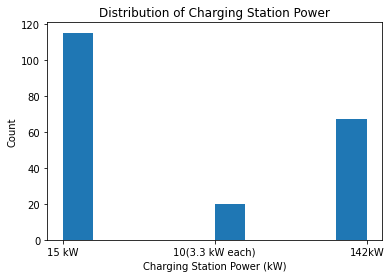

In [47]:
plt.hist(df['power'], bins=10)

# add labels and title
plt.xlabel('Charging Station Power (kW)')
plt.ylabel('Count')
plt.title('Distribution of Charging Station Power')

# display the plot
plt.show()

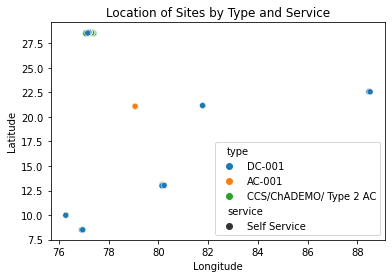

In [48]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue="type", style="service")

# Add a title and labels
plt.title("Location of Sites by Type and Service")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Power Levels')

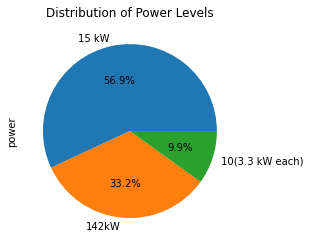

In [49]:
df['power'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Power Levels')


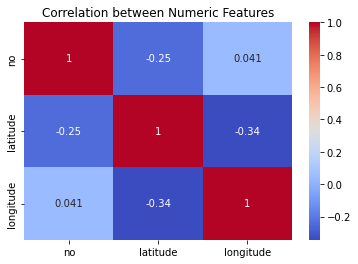

In [50]:
# Create a heatmap of the correlation between numerical columns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title
plt.title("Correlation between Numeric Features")

# Show the plot
plt.show()


In [51]:
import plotly.graph_objects as go

power_counts = df['power'].value_counts()
fig = go.Figure([go.Bar(x=power_counts.index, y=power_counts.values)])
fig.update_layout(title='Count of Power Levels', xaxis_title='Power Level', yaxis_title='Count')
fig.show()


In [52]:
fig = px.histogram(df, x='latitude', nbins=20, color='type')
fig.update_layout(title='Distribution of Latitude by Type', xaxis_title='Latitude')
fig.show()


In [53]:
fig = px.box(df, y='latitude', x='type', color='type')
fig.update_layout(title='Distribution of Latitude by Type')
fig.show()


In [54]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the data


# Convert the "power" column to a string type
df["power"] = df["power"].astype(str)

# Preprocess the data
df["power"] = df["power"].str.extract("(\d+)").astype(float)

# Select the features for clustering
X = df[["latitude", "longitude", "power"]]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Add the cluster labels to the DataFrame
df["cluster"] = kmeans.labels_

# Print the first few rows of the DataFrame with the cluster labels
print(df.head())


   no region                                            address  \
0   1   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
1   2   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
2   3   NDMC  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...   
3   4   NDMC  Opposite Dory Pharmacy, Khanna Market, Aliganj...   
4   5   NDMC  Opposite Goel Opticals, Khanna Market, Aliganj...   

                                          aux addres   latitude  longitude  \
0  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
1  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
2  Electric Vehicle Charger, Outside RWA Park, Jo...  28.588303  77.217697   
3  Electric Vehicle Charger, Opposite Dory Pharma...  28.582654  77.220087   
4  Electric Vehicle Charger, Opposite Goel Optica...  28.584485  77.220316   

     type  power       service  cluster  
0  DC-001   15.0  Self Service        1  
1  DC-001   15.0  Self Service        1  
2 